# Plot the entries per year for every year from 1990 to 2023

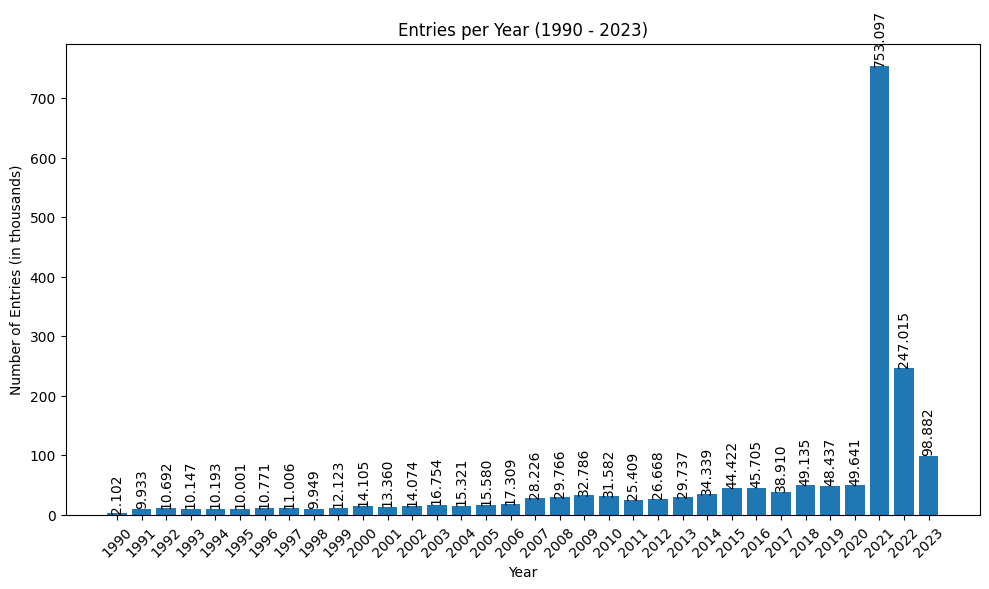

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def thousands_formatter(x, pos):
    """The two args are the value and tick position."""
    return f'{int(x / 1000)}'


def format_with_dot(num):
    """Format the number with a period as the thousands separator."""
    return f'{num:,}'.replace(',', '.')


# Initialize a dictionary to store the number of entries per year
entries_per_year = {}

# Loop through each year from 1990 to 2023
for year in range(1990, 2024):
    try:
        # Construct the filename
        path = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"
        filename = f"{year}VAERSDATA.csv"

        # Load the CSV file
        data = pd.read_csv(path + filename, encoding="Iso-8859-1", low_memory=False)

        # Count the number of entries and store it
        entries_per_year[year] = len(data)
    except FileNotFoundError:
        print(f"File for year {year} not found.")
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Plotting the data
years = list(entries_per_year.keys())
counts = list(entries_per_year.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(years, counts)
plt.xlabel('Year')
plt.ylabel('Number of Entries (in thousands)')
plt.title('Entries per Year (1990 - 2023)')

# Set the y-axis formatter
formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    formatted_value = format_with_dot(yval)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, formatted_value,
             va='bottom', ha='center', rotation=90)

plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


# Plot the entries per year for every year before Covid-19 (first vaccinations started Dezember 2020)

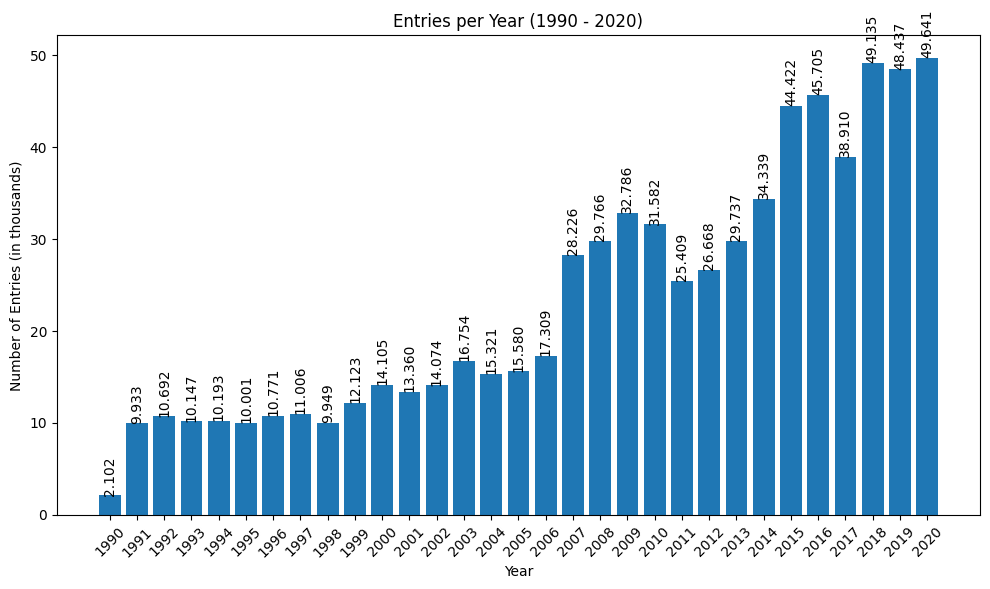

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def thousands_formatter(x, pos):
    """The two args are the value and tick position."""
    return f'{int(x / 1000)}'


def format_with_dot(num):
    """Format the number with a period as the thousands separator."""
    return f'{num:,}'.replace(',', '.')


# Initialize a dictionary to store the number of entries per year
entries_per_year = {}

# Loop through each year from 1990 to 2023
for year in range(1990, 2021):
    try:
        # Construct the filename
        path = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"
        filename = f"{year}VAERSDATA.csv"

        # Load the CSV file
        data = pd.read_csv(path + filename, encoding="Iso-8859-1", low_memory=False)

        # Count the number of entries and store it
        entries_per_year[year] = len(data)
    except FileNotFoundError:
        print(f"File for year {year} not found.")
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Plotting the data
years = list(entries_per_year.keys())
counts = list(entries_per_year.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(years, counts)
plt.xlabel('Year')
plt.ylabel('Number of Entries (in thousands)')
plt.title('Entries per Year (1990 - 2020)')

# Set the y-axis formatter
formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    formatted_value = format_with_dot(yval)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, formatted_value,
             va='bottom', ha='center', rotation=90)

plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

# Plot percentage change in relation to prior year

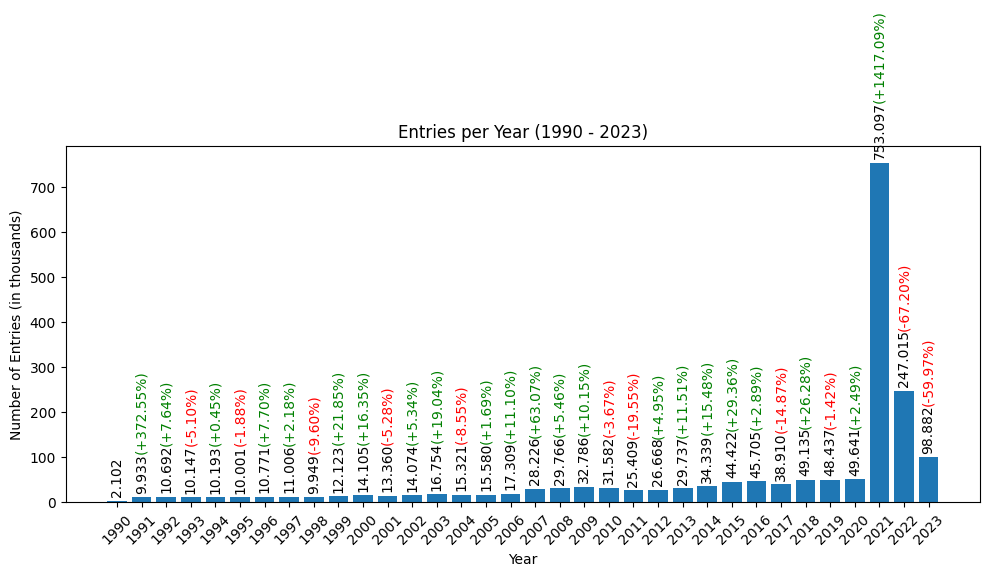

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Custom formatter function
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}'

def format_with_dot(num):
    return f'{num:,}'.replace(',', '.')

# Initialize a dictionary to store the number of entries per year
entries_per_year = {}

# Loop through each year from 1990 to 2023
for year in range(1990, 2024):
    try:
        path = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"
        filename = f"{year}VAERSDATA.csv"
        data = pd.read_csv(path + filename, encoding="Iso-8859-1", low_memory=False)
        entries_per_year[year] = len(data)
    except FileNotFoundError:
        print(f"File for year {year} not found.")
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Convert to DataFrame and calculate percentage change
df = pd.DataFrame(list(entries_per_year.items()), columns=['Year', 'Count'])
df['Pct_Change'] = df['Count'].pct_change() * 100

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Year'], df['Count'])

plt.xlabel('Year')
plt.ylabel('Number of Entries (in thousands)')
plt.title('Entries per Year (1990 - 2023)')

# Set the y-axis formatter
formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

count = 0 
# Annotate each bar with its value and percentage change
for bar, pct_change in zip(bars, df['Pct_Change']):
    
    yval = bar.get_height()
    formatted_value = format_with_dot(yval)

    # Annotate with the count value in default color
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, formatted_value,
             va='bottom', ha='center', rotation=90)
    # Determine the color based on the percentage change
    if count != 0:
        color = 'green' if pct_change > 0 else 'red' if pct_change < 0 else 'black'
        if yval < 10000:
            offset = 97500
        elif yval >= 10000 and yval < 100000:
            offset = 115000
        else: offset = 135000
        # Annotate with the percentage change in colored text
        plt.text(bar.get_x() + bar.get_width()/2, yval + offset , f"({pct_change:+.2f}%)",
                 va='bottom', ha='center', rotation=90, color=color)
    count+=1

plt.xticks(df['Year'], rotation=45)
plt.tight_layout()
plt.show()